1
after try
2
after try
here
4
after try
5
after try
6
after try


In [5]:
import pandas as pd


In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
from lightgbm import LGBMRegressor
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', 30)

In [7]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/shreyas36/data/main/jt3%20click%20through%20rate%20prediction/train.csv')


In [8]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


In [10]:
df.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [11]:
df.drop(['is_timer'], axis=1, inplace=True)

In [12]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [23]:
categorical=['times_of_day']

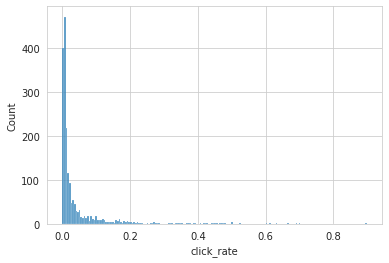

In [ ]:
sns.histplot(df['click_rate'])

<AxesSubplot:>

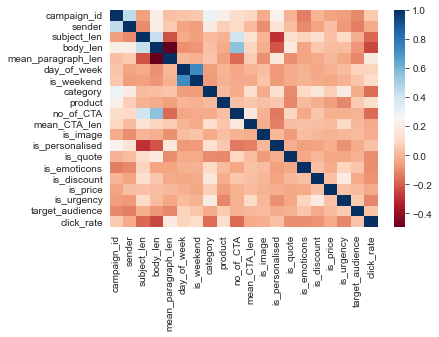

In [15]:
sns.heatmap(df.corr(),cmap='RdBu')

In [13]:
df['paragraphs'] = df['body_len'] / df['mean_paragraph_len']
df['total_CTA'] = df['no_of_CTA'] * df['mean_CTA_len']

In [41]:
df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience', 'click_rate', 'paragraphs',
       'total_CTA'],
      dtype='object')

<AxesSubplot:xlabel='sender', ylabel='click_rate'>

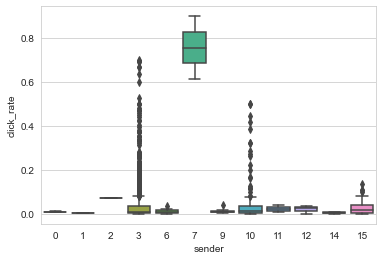

In [53]:
#box plot for click rate and is_urgency
sns.boxplot(x='sender', y='click_rate', data=df)


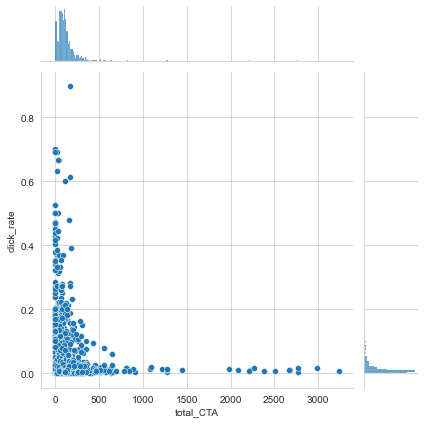

In [43]:
#plot kde of body_leng and click_rate
sns.jointplot(x='total_CTA', y='click_rate', data=df)
# sns.histplot(df['body_len'])


In [31]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [32]:
labelencoder = LabelEncoder()

In [33]:
for i in categorical:
    df[i]=labelencoder.fit_transform(df[i])

In [34]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,paragraphs,total_CTA
0,1,3,76,10439,39,5,1,2,6,26,3,29,0,0,0,0,0,0,0,14,0.103079,267.666667,87
1,2,3,54,2570,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000,10.039062,0
2,3,3,59,12801,16,5,1,2,2,11,3,23,1,0,1,0,0,0,0,16,0.002769,800.062500,69
3,4,3,74,11037,30,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10,0.010868,367.900000,96
4,5,3,80,10011,27,5,1,2,6,26,3,31,0,0,1,0,0,0,0,14,0.142826,370.777778,93


In [35]:
X=df.drop(columns=['click_rate','campaign_id'])
y=df[['click_rate']]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250)
regressor.fit(X_train, y_train) 

C:\Users\shrey\AppData\Local\Temp/ipykernel_10356/1401242226.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=250)

In [38]:
preds=regressor.predict(X_test)
from sklearn.metrics import r2_score
r2 = (r2_score(y_test, preds))
r2

0.38979149324840034

In [39]:
importances=regressor.feature_importances_
feature_names=X.columns
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)


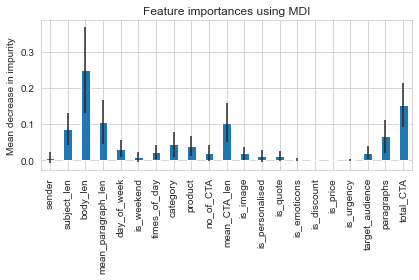

In [40]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Elapsed time to compute the importances: 15.437 seconds


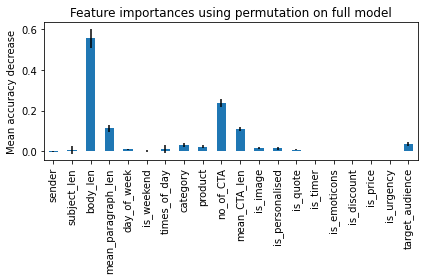

In [52]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    regressor, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestRegressor(), {'n_estimators':[50,100,150,200,250,300]})
clf.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import r2_score
rms = (r2_score(y_test, preds))
rms

0.485771923545234

In [2]:
!pip install pycaret
# !pip install markupsafe==2.0.1


^C


In [4]:
a = {'Q1': ['01-01', '03-31']}
b = '2015-Q1'
for i in a[b[-2:]]:
    print(b[:-2]+i)


2015-01-01
2015-03-31


In [2]:
import platform
print(platform.python_version())
import sys
sys.version_info


3.10.4


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)

In [ ]:

insert into data_profile_rule_info Values(3, 'CUST_DIM', 'Oracle', 'PEDW', 'EDW', 'Y', 'CREATE_DT', 'N', sysdate, sysdate)
#write a varible to pickle file
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [3]:
from pycaret.regression import *

In [ ]:
import pandas as pd
df=pd.read_csv('https://github.com/shreyas36/data/raw/main/jt3%20click%20through%20rate%20prediction/train.csv')

In [ ]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [14]:
m=setup(data=df,target='click_rate')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:34:23
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,3.140000e-02,3.700000e-03,5.890000e-02,4.320000e-01,0.0497,2.444700e+00,1.273
et,Extra Trees Regressor,3.060000e-02,3.700000e-03,5.920000e-02,4.091000e-01,0.0499,2.405600e+00,1.118
lightgbm,Light Gradient Boosting Machine,3.270000e-02,3.900000e-03,6.040000e-02,3.942000e-01,0.0505,2.397700e+00,0.105
gbr,Gradient Boosting Regressor,3.300000e-02,3.900000e-03,6.060000e-02,3.915000e-01,0.0512,2.491000e+00,0.267
omp,Orthogonal Matching Pursuit,4.310000e-02,5.500000e-03,7.210000e-02,1.639000e-01,0.0603,3.908700e+00,0.027
ridge,Ridge Regression,4.460000e-02,5.700000e-03,7.320000e-02,1.391000e-01,0.0613,4.249700e+00,0.044
br,Bayesian Ridge,4.480000e-02,6.000000e-03,7.500000e-02,1.124000e-01,0.0624,4.249300e+00,0.043
lr,Linear Regression,4.580000e-02,5.800000e-03,7.420000e-02,9.620000e-02,0.0620,4.479300e+00,0.623
knn,K Neighbors Regressor,4.090000e-02,5.700000e-03,7.370000e-02,8.790000e-02,0.0630,3.770900e+00,0.069
lasso,Lasso Regression,4.790000e-02,6.800000e-03,7.970000e-02,3.800000e-03,0.0669,4.994500e+00,0.037


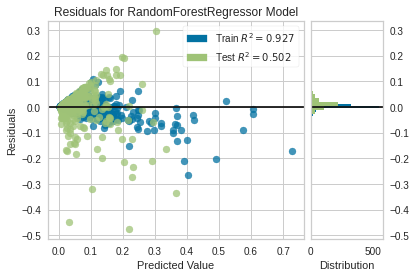

In [ ]:
plot_model(best_model)

In [34]:
test_df = pd.read_csv('https://github.com/shreyas36/data/raw/main/jt3%20click%20through%20rate%20prediction/test.csv')
test_df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [ ]:
preds=predict_model(best_model,test_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4581, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


In [ ]:
preds['Label']

0      0.050074
1      0.349780
2      0.187063
3      0.186972
4      0.142353
         ...   
757    0.007561
758    0.013704
759    0.013930
760    0.241524
761    0.016562
Name: Label, Length: 762, dtype: float64

In [ ]:
test_df['click_rate']=preds['Label']

In [35]:
for i in categorical:
    test_df[i]=labelencoder.fit_transform(test_df[i])

In [36]:
test_df['click_rate']=regressor.predict(test_df)

In [ ]:
ans=pd.DataFrame(preds['Label'])


In [ ]:
ans=pd.DataFrame(ans)

In [ ]:
ans.columns=['price']

In [37]:
ans=test_df[['campaign_id','click_rate']]

In [39]:
ans.to_csv('jt3.csv',index=False)

In [38]:
ans

,campaign_id,click_rate
0,1889,0.108766
1,1890,0.306174
2,1891,0.266209
3,1892,0.272135
4,1893,0.119621
...,...,...
757,2646,0.028271
758,2647,0.017447
759,2648,0.042794
760,2649,0.288295


In [ ]:
pd.read_csv('https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_LJ2N3ZQ.csv')

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454
...,...,...
757,2646,0.043454
758,2647,0.043454
759,2648,0.043454
760,2649,0.043454


In [ ]:

insert into data_profile_rule_info Values(4, 'STATEMENT_HIST_VW', 'snowflake', 'EDH_DB', 'JS_STATEMENT', 'Y', 'STATEMENT_DT', 'N', sysdate, sysdate)
